In [4]:
import matplotlib.pyplot as plt
from skimage import feature
import numpy as np
import cv2

In [5]:
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

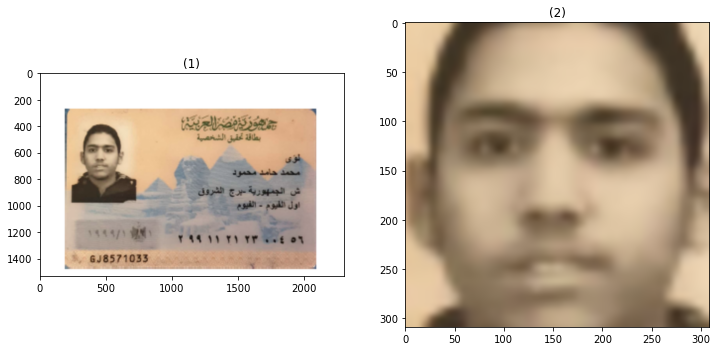

In [13]:
TestDir = "C:\\Collage\\GP\\test\\"
#load image
far_face_image = cv2.imread(TestDir+"Loay Mohamed - ID.png")

# detect there faces
from Emotions_Detection.Models.face_detection import get_faces_from_image

faces = get_faces_from_image(far_face_image, is_dir=False, is_gray=False)
far_face = None
for face in faces:
    far_face = far_face_image[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
show_images([far_face_image,far_face])

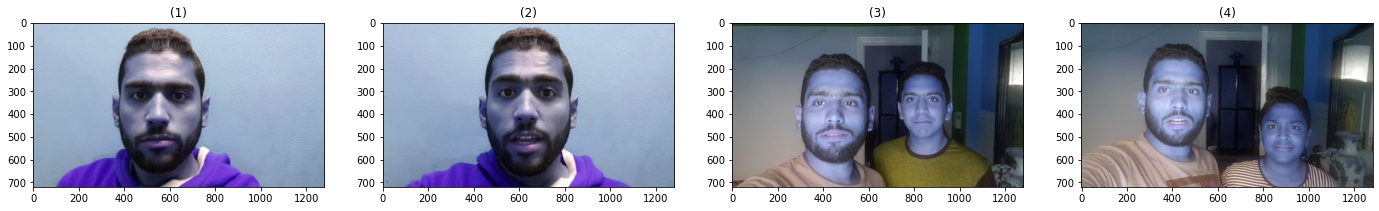

In [14]:
TestDir = "C:\\Collage\\GP\\test\\"
cap = cv2.VideoCapture(TestDir+"no_speak.mp4")
success, img1 = cap.read()
#release cap
cap.release

cap = cv2.VideoCapture(TestDir+"speaking.mp4")
success, img2 = cap.read()
#release cap
cap.release

cap = cv2.VideoCapture(TestDir+"modhek.mp4")
success, img3 = cap.read()
#release cap
cap.release

cap = cv2.VideoCapture(TestDir+"testt.mp4")
success, img4 = cap.read()
#release cap
cap.release
show_images([img1, img2, img3, img4])

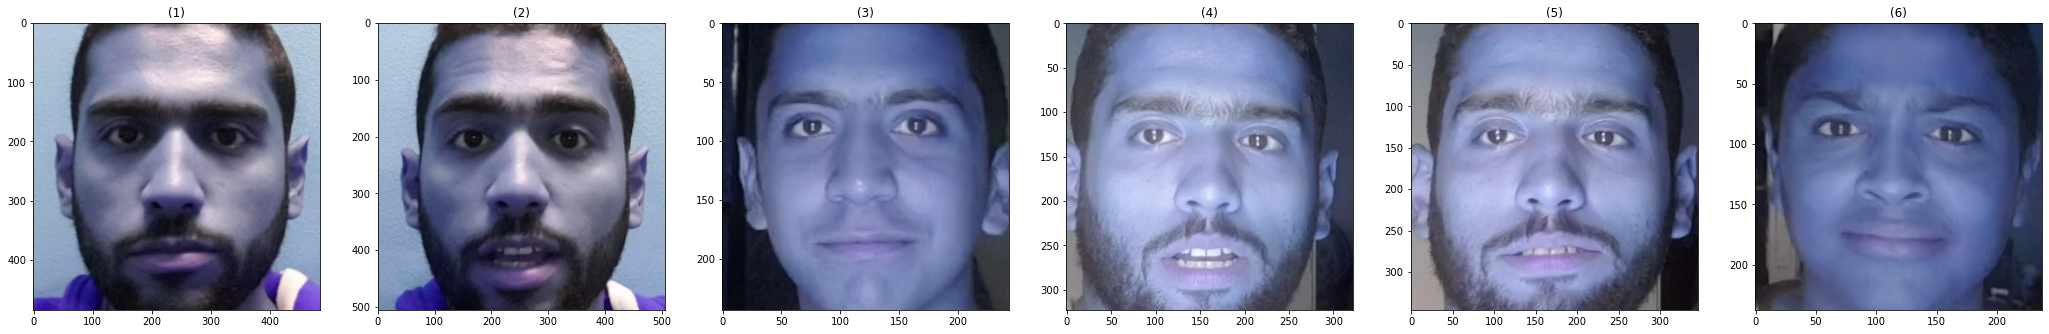

In [15]:
# detect there faces
from Emotions_Detection.Models.face_detection import get_faces_from_image

faces = get_faces_from_image(img1, is_dir=False, is_gray=False)
face1 = None
for face in faces:
    face1 = img1[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

faces = get_faces_from_image(img2, is_dir=False, is_gray=False)
face2 = None
for face in faces:
    face2 = img2[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

faces = get_faces_from_image(img3, is_dir=False, is_gray=False)
face3 = None
face4 = None
face= faces[0]
face3 = img3[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
face= faces[1]
face31 = img3[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

faces = get_faces_from_image(img4, is_dir=False, is_gray=False)
face= faces[0]
face4 = img4[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
face= faces[1]
face41 = img4[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

show_images([face1, face2, face3, face4,face31, face41])


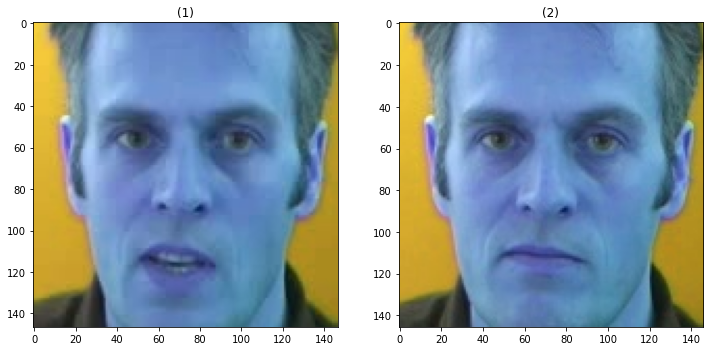

In [16]:
## test on diff images:
imgg1 = cv2.imread(TestDir+"frame0.jpg")
imgg2 = cv2.imread(TestDir+"frame69.jpg")

faces = get_faces_from_image(imgg1, is_dir=False, is_gray=False)
face11 = None
for face in faces:
    face11 = imgg1[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

faces = get_faces_from_image(imgg2, is_dir=False, is_gray=False)
face12 = None
for face in faces:
    face12 = imgg2[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

show_images([face11, face12])

## LBP (Local Binary Patterns)

In [17]:
class LocalBinaryPatterns:
  def __init__(self , numPoints , radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self , image , eps=1e-7):
    lbp = feature.local_binary_pattern(image , self.numPoints , self.radius)
    hist = plt.hist(lbp.ravel())
    return lbp , hist

In [18]:
desc = LocalBinaryPatterns(8 , 4)

In [19]:
def preprocess_img(face_img):
  face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
  _ , hist = desc.describe(face)
  return np.array(hist[0])

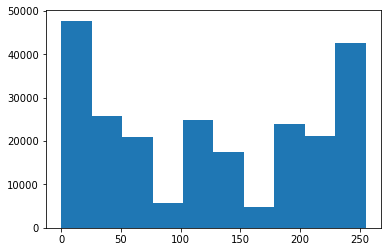

In [22]:
hist1 = preprocess_img(face1)

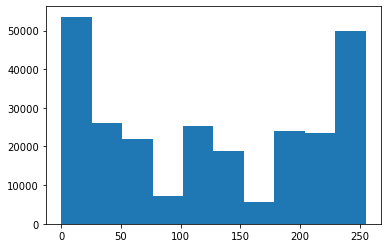

In [ ]:
hist2 = preprocess_img(face2)

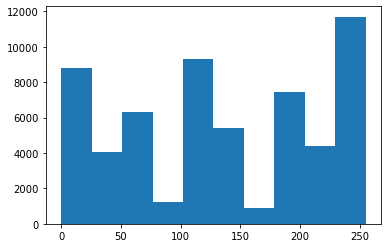

In [ ]:
hist3 = preprocess_img(face3)

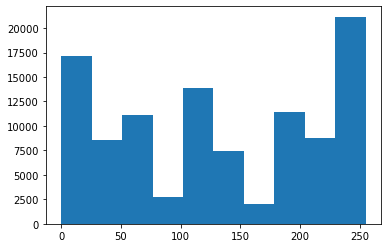

In [ ]:
hist4 = preprocess_img(face4)

In [ ]:
# find normalized distance between vectors
d1= np.array(hist1[0])
d2= np.array(hist2[0])
d3= np.array(hist3[0])
d4= np.array(hist4[0])

dist12 = np.linalg.norm(d1-d2)*2 / (np.linalg.norm(d1)+np.linalg.norm(d2))
print(dist12)
dist13 = np.linalg.norm(d1-d3)*2 / (np.linalg.norm(d1)+np.linalg.norm(d3))
print(dist13)
dist14 = np.linalg.norm(d1-d4)*2 / (np.linalg.norm(d1)+np.linalg.norm(d4))
print(dist14)

dist23 = np.linalg.norm(d2-d3)*2 / (np.linalg.norm(d2)+np.linalg.norm(d3))
print(dist23)
dist24 = np.linalg.norm(d2-d4)*2 / (np.linalg.norm(d2)+np.linalg.norm(d4))
print(dist24)

dist34 = np.linalg.norm(d3-d4)*2 / (np.linalg.norm(d3)+np.linalg.norm(d4))
print(dist34)



0.10937985089375146
1.2095127303836433
0.7914172569461275
1.2695258986343252
0.8703344539752788
0.5526804553455585


In [ ]:
dAll = np.array([d1,d2,d3,d4])
print(d1)
print(d2)
print(d3)
print(d4)
dAvg = np.mean(dAll, axis=0)
print(dAvg)

[47795. 25881. 20927.  5712. 24987. 17382.  4843. 23885. 21082. 42731.]
[53572. 26171. 21865.  7166. 25384. 18908.  5639. 24088. 23443. 49800.]
[ 8823.  4055.  6297.  1236.  9313.  5394.   890.  7437.  4390. 11701.]
[17116.  8593. 11165.  2765. 13846.  7463.  2044. 11371.  8810. 21156.]
[31826.5  16175.   15063.5   4219.75 18382.5  12286.75  3354.   16695.25
 14431.25 31347.  ]


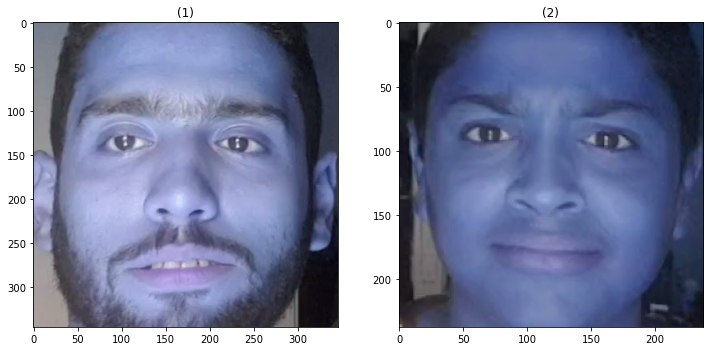

0.733985131241293


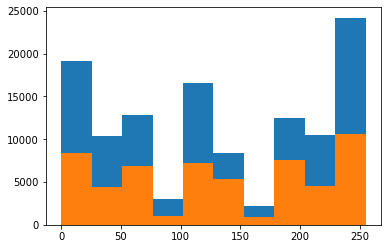

In [ ]:
show_images([face31, face41])
lbp31 , hist31 = preprocess_img(face31)
lbp41 , hist41 = preprocess_img(face41)
d31= np.array(hist31[0])
d41= np.array(hist41[0])
dist3141 = np.linalg.norm(d41-d31)*2 / (np.linalg.norm(d31)+np.linalg.norm(d41))
print(dist3141)

0.06961074867343055


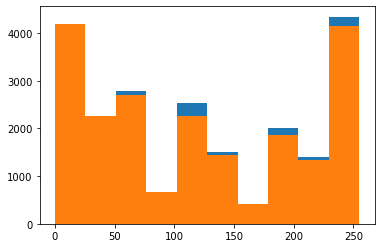

In [ ]:
lbp11 , hist11 = preprocess_img(face11)
lbp12 , hist12 = preprocess_img(face12)
d11= np.array(hist11[0])
d12= np.array(hist12[0])
dist1112 = np.linalg.norm(d11-d12)*2 / (np.linalg.norm(d11)+np.linalg.norm(d12))
print(dist1112)



LBP algorithm, instead of looking into the entire image, it first divide the whole image into a SxS grid. Then this algorithm convert each grid into the LBP format and obtain the intensity distribution of that particular grid. After doing this process, this model produces S^2 histogram. After doing that, the model concatnate all of the produced histograms. Then we perform distance between histograms to find if face now is the same as the previous face.

In [ ]:
def local_binary_pattern(gray_image, kernel_size=3):
    # allocation.
    lbp_image = np.zeros_like(gray_image)
    kernel_size = kernel_size
    center_pixel = int(kernel_size // 2)
    for ih in range(0, image.shape[0] - kernel_size):
        for iw in range(0, image.shape[1] - kernel_size):

            # move the kernel along the image.
            img = gray_image[ih:ih + kernel_size, iw:iw + kernel_size]

            # simple filter that only leaves out the ones bigger than the center pixel.
            center = img[center_pixel, center_pixel]
            # 3 * 3, processed kernel.
            filtered_kernel = (img >= center) * 1.0

            flat_kernel = filtered_kernel.T.flatten()
            # it is ok to order counterclock manner
            # img01_vector = img01.flatten()

            # remove the center, e.g the 5th element of a size 9 kernel (3 * 3).
            flat_kernel = np.delete(flat_kernel, 4)
            # example: [1. 0. 0. 1. 0. 1. 1. 1.]

            non_zero_locations = np.where(flat_kernel)[0]
            if len(non_zero_locations) >= 1:
                num = np.sum(2 ** non_zero_locations)
            else:
                num = 0
            # adjust the center value.
            lbp_image[ih + center_pixel, iw + center_pixel] = num
    return lbp_image


(array([47795., 25881., 20927.,  5712., 24987., 17382.,  4843., 23885.,
       21082., 42731.]), array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
       229.5, 255. ]), <BarContainer object of 10 artists>)


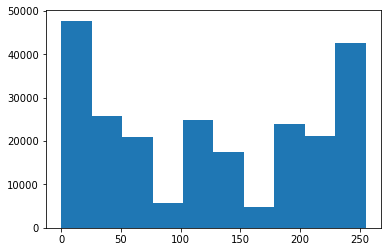

In [ ]:
## test on diff images:
image = cv2.cvtColor(face1, cv2.COLOR_BGR2GRAY)
lbp1 = feature.local_binary_pattern(image , 8 , 4)
hist1 = plt.hist(lbp1.ravel())
print(hist1)


(array([35237., 26737.,  7112.,  2098., 34625., 14590.,  3966.,  4062.,
       28162., 78636.]), array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
       229.5, 255. ]), <BarContainer object of 10 artists>)


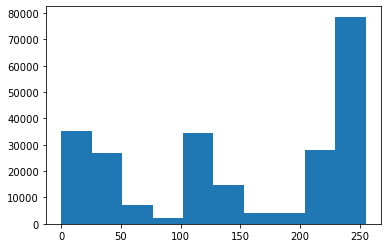

In [ ]:
lbp2 = local_binary_pattern(image)
hist2 = plt.hist(lbp2.ravel())
print(hist2)

In [29]:
## Adding testing to the model:
import os
import glob
#1. load the test set:
DataSetDir = "C:\\Collage\\GP\\My_Social_Eye\\Speaker_Detection\\dataset_formation\\open_mouth_test\\pair"
images = []
X_test = []
y_test = [] # 0 if same person , 1 if not

#loop over all images in that directory
pair1 = glob.glob(DataSetDir+'1/*.jpg')
pair2 = glob.glob(DataSetDir+'2/*.jpg')
pair3 = glob.glob(DataSetDir+'3/*.jpg')

# make the same person test set
for i in range(len(pair1)):
    images.append(pair1[i])
    for j in range(i+1, len(pair1)):
        X_test.append((i,j))
        y_test.append(0)
const = len(pair1)
for i in range(len(pair2)):
    images.append(pair2[i])
    for j in range(i+1, len(pair2)):
        X_test.append((i+const,j+const))
        y_test.append(0)
const += len(pair2)
for i in range(len(pair3)):
    images.append(pair3[i])
    for j in range(i+1, len(pair3)):
        X_test.append((i+const,j+const))
        y_test.append(0)

# # now make the not same person test set
# for i in range(len(pair1)):
#     for j in range(len(pair2)):
#         X_test.append((i , j+len(pair1)))
#         y_test.append(1)
#     for j in range(len(pair3)):
#         X_test.append((i , j+len(pair1)+len(pair2)))
#         y_test.append(1)

# for i in range(len(pair2)):
#     for j in range(len(pair3)):
#         X_test.append((i+len(pair1) , j+len(pair1)+len(pair2)))
#         y_test.append(1)
# len(images)

In [30]:
# preprocess the image
x_preprocess = []
for img_path in images:
    # detect faces
    img = cv2.imread(img_path)
    faces = get_faces_from_image(img, is_dir=False, is_gray=False)
    if len(faces) == 0:
        print('shit')
        continue
    face = faces[0]
    x_preprocess.append(img[face[1]:face[1]+face[3], face[0]:face[0]+face[2]])


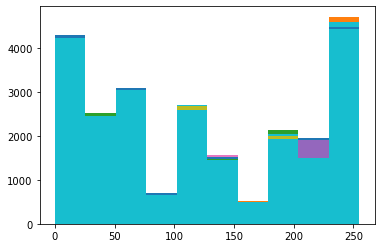

In [31]:
# extract features
features = []
for pre_img in x_preprocess:
    features.append(preprocess_img(pre_img))

# Testing Accuracy:

In [41]:
TRACKING_THRES = 0.5
def model(face_1,face_2):
    # detect if they are same or not
    # return 0 if same, 1 if not
    dist = np.linalg.norm(face_1-face_2)*2 / (np.linalg.norm(face_1)+np.linalg.norm(face_2))
    return 0 if dist < TRACKING_THRES  else 1

In [42]:
pred = []
for i in range(len(X_test)):
    pred.append(model(features[X_test[i][0]], features[X_test[i][1]]))

In [43]:
from sklearn import metrics
y_test = np.array(y_test)
pred = np.array(pred)
ascore = metrics.accuracy_score(y_test, pred)
pscore = metrics.precision_score(y_test, pred,average='weighted')
rscore = metrics.recall_score(y_test, pred,average='weighted')
fscore = metrics.f1_score(y_test, pred,average='weighted')
print("Accuracy:",round(ascore*100,2) ,'%')
print("Precision:",round(pscore*100,2),'%')
print("Recall:",round(rscore*100,2),'%')
print("f1 score:",round(fscore*100,2),'%')

Accuracy: 80.04 %
Precision: 100.0 %
Recall: 80.04 %
f1 score: 88.91 %


c:\Users\HP\anaconda3\envs\cufe\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
